<center><b><h1>Current Research in Data Science</b></center>
<center><b><h3>Interpretable Machine Learning Group 3</b></center>
<br>
<center><b><h4>Data Pre-processing</b></center>
<br>
Team: Siddharth Bhargava, Tanveer Hannan <br>
Mentor: Chrisoph Molnar
<br>

**Problem Statement**: Bank Campaign Dataset (https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset)

#### Theory:

**Book:** https://christophm.github.io/interpretable-ml-book/

**Paper:** https://core.ac.uk/download/pdf/55631291.pdf


Key Facts about the Data:

- 22 features reduced from 150 features
- Time series : May 2008 to June 2013 (we don't have the temporal information)
- Binary Classification: successful or unsuccessful campaign




##  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fancyimpute import IterativeImputer # requires sklearn version 0.20 / 0.21
from sklearn.preprocessing import OrdinalEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
%matplotlib inline

%load_ext autoreload
import sys
sys.path.insert(0, "..")
import os
os.chdir("..")

## Load data

In [ ]:
%load_ext autoreload
import sys
sys.path.insert(0, "..")
import os
os.chdir("..")

In [2]:
bank_data = pd.read_csv("data/bank-additional-full.csv", sep=";")

In [3]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Exploratory Data Analysis before Data Preprocessing:

We divided the data into four categories namely,

* Demographics
* Last Campaign Details
* Campaign History
* Socio-economic Indicators





#### Initial Basic *Statistics*

In [5]:
# We have an imbalanced dataset.

bank_data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
# check to see the number of missing values, indicated by the term "unknown"
cols = [x for x in bank_data.columns]
bank_data["contains_unknown"] = (bank_data[cols]=="unknown").any(axis="columns")
bank_data["contains_unknown"].value_counts()

/home/ubuntu/anaconda3/envs/repro/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


False    30488
True     10700
Name: contains_unknown, dtype: int64

#### Demographics

1.   Education
2.   Age
3. Job
4. Marital Status 
5. Default
6. Housing
7. Loan


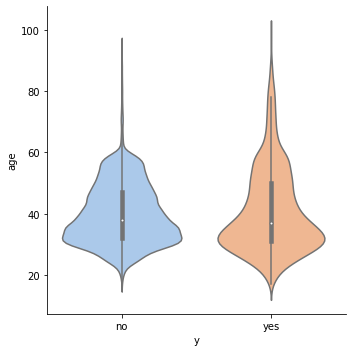

In [7]:
# age
sns.catplot(y="age", x="y", kind="violin", palette="pastel", split=True, data=bank_data)

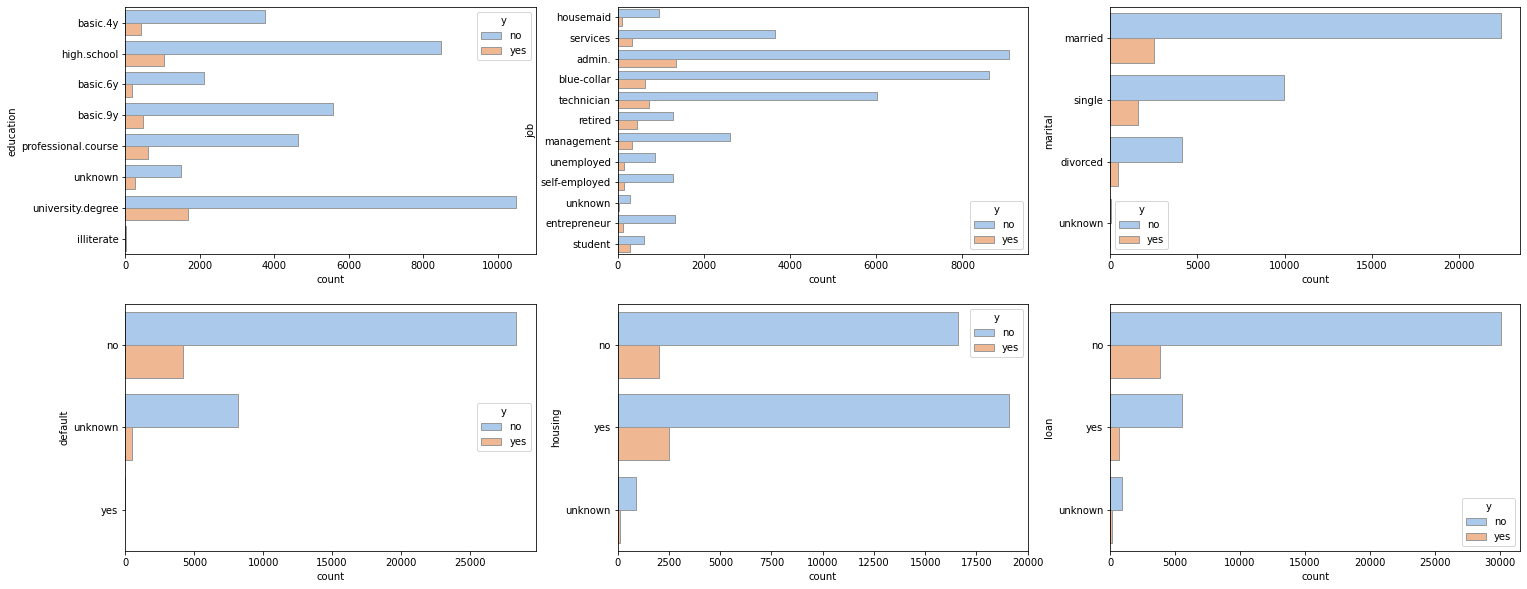

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(25,10))
sns.countplot(y="education", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0, 0])
sns.countplot(y="job", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0, 1])
sns.countplot(y="marital", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0, 2])
sns.countplot(y="default", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1, 0])
sns.countplot(y="housing", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1, 1])
sns.countplot(y="loan", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1, 2])

#### Last Campaign Details

1. Contact
2. Month
3. Day of the Week
4. Duration

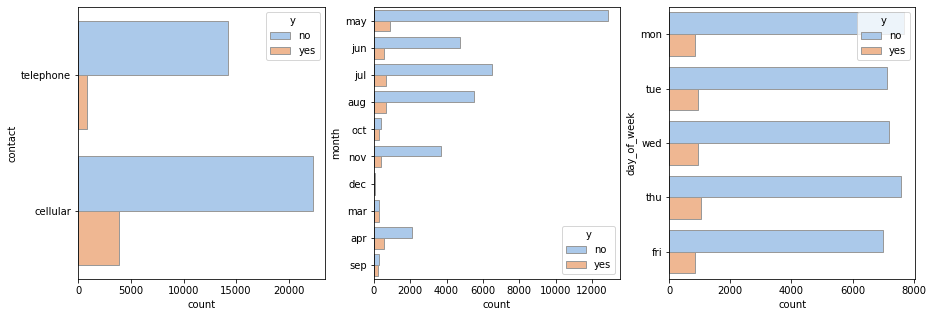

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.countplot(y="contact", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0])
sns.countplot(y="month", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1])
sns.countplot(y="day_of_week", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[2])

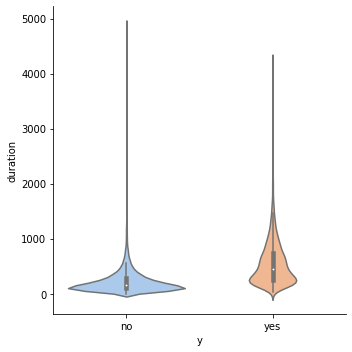

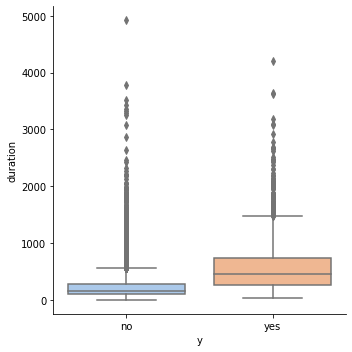

In [10]:
sns.catplot(y="duration", x="y", kind="violin", palette="pastel", split=True, data=bank_data)
sns.catplot(y="duration", x="y", kind="box", palette="pastel", data=bank_data)

#### Campaign History

1. number of contacts in this campaign
2. number of days since last campaign
3. number of contacts before this campaign
4. outcome of previous marketing campaign

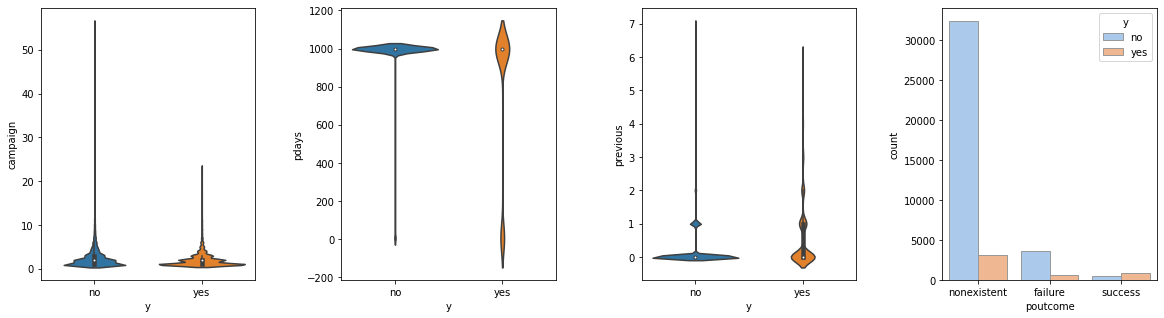

In [11]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(141)
sns.violinplot(x="y", y="campaign",
               data=bank_data, split=True, ax=ax)

ax = fig.add_subplot(142)
sns.violinplot(x="y", y="pdays",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.2)
ax = fig.add_subplot(143)
sns.violinplot(x="y", y="previous",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.4)
ax = fig.add_subplot(144)
sns.countplot(x="poutcome", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=ax)

In [12]:
pdays_filtered = bank_data[bank_data["poutcome"] == "nonexistent"]["pdays"]
pdays_left = bank_data.loc[bank_data["poutcome"] != "nonexistent"]["pdays"]

In [13]:
pdays_filtered.unique(), len(pdays_filtered)

(array([999]), 35563)

In [14]:
pdays_left.unique(), len(pdays_left)

(array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
         12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
         20]),
 5625)

In [15]:
pdays_left.value_counts().sort_values()

20        1
25        1
26        1
27        1
21        2
19        3
22        3
18        7
17        8
16       11
0        15
8        18
14       20
15       24
1        26
11       28
13       36
5        46
10       52
12       58
7        60
2        61
9        64
4       118
6       412
3       439
999    4110
Name: pdays, dtype: int64

More than 80% of the data has "nonexistent" value and the same corresponding value of "999" as seen here. 
Based on this, we decided to leave "poutcome" in our dataset and remove "pdays" from it.

#### Socio-Economic Attributes

1. Employment Variation Rate (Quarterly)
2. Consumer Price Index (Monthly)
3. Consumer Confidence Index (Monthly)
4. Euribor 3 Month Rate (Daily)
5. Number of Employees (Quarterly)

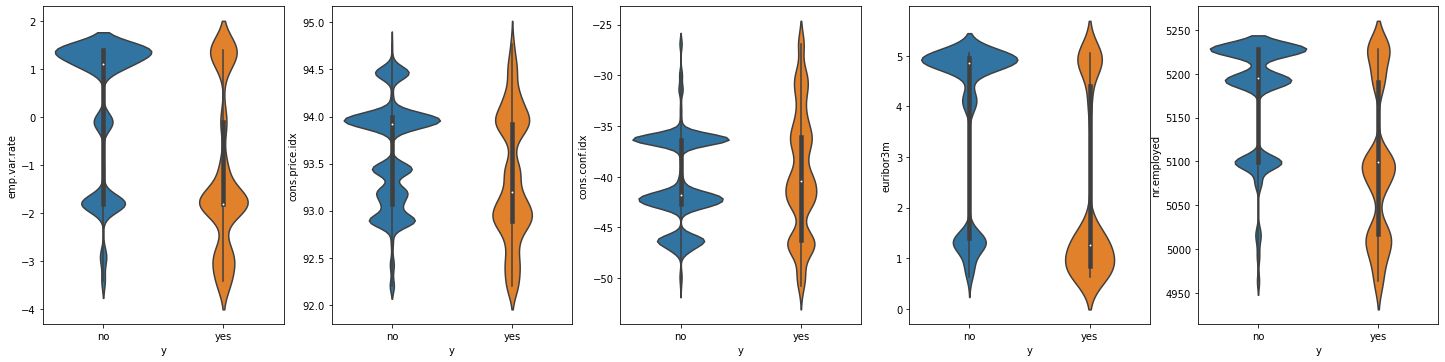

In [16]:
# emp.var.rate		cons.conf.idx	euribor3m	nr.employed
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(151)
fig.tight_layout()
sns.violinplot(x="y", y="emp.var.rate",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.2)
ax = fig.add_subplot(152)
sns.violinplot(x="y", y="cons.price.idx",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.2)
ax = fig.add_subplot(153)
sns.violinplot(x="y", y="cons.conf.idx",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.2)
ax = fig.add_subplot(154)
sns.violinplot(x="y", y="euribor3m",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.2)
ax = fig.add_subplot(155)
sns.violinplot(x="y", y="nr.employed",
               data=bank_data, split=True, ax=ax)

## Imputation:

#### Handling Missing Data: KNN Imputation vs MICE Imputation

Run the imputation.py script to generate the imputed dataset. TO use KNN Imputation call the KNNImputer and to use the MICE Imputation, call the IterativeImputer. 

#### Compare the two imputed files: KNN and MICE

In [17]:
# load the generated datasets from the two approaches first.
bank_knn = pd.read_csv("data/imputed_bank_data_knn.csv")
bank_mice = pd.read_csv("data/imputed_bank_data_mice.csv")
bank_knn.equals(bank_mice)

False

In [18]:
df_diff = bank_knn.eq(bank_mice)

In [19]:
cols = [x for x in df_diff.columns]
df_diff["contains_difference"] = (df_diff[cols]==False).any(axis="columns")
df_diff["contains_difference"].value_counts()

False    39338
True      1850
Name: contains_difference, dtype: int64

Since there is not a lot of difference between the two approaches, we decided to stay with MICE imputation and drop the KNN imputation. 

Below, we have some visualizations showing the difference in the dataset after imputation.

In [33]:
# load the data after imputation and run the bin_duration function to bin the feature "duration"

def outlier_removal(imputed_bank_data, column, quantile = 0.99):

    q = imputed_bank_data[column].quantile(quantile)
    return  imputed_bank_data[imputed_bank_data[column] < q]

def bin_duration(imputed_bank_data):

    duration_bin_labels = ['less than 200sec', '200sec - 400sec', '400sec - 800sec', 
                    'more than 800sec']
    dur_bin_size = [-1, 200, 400, 800, 200000]

    # remove outliers
    imputed_bank_data = outlier_removal(imputed_bank_data, column="duration", quantile=0.99)

    # bin duration
    imputed_bank_data["binned_duration"] = pd.cut(imputed_bank_data["duration"],
                                               bins=dur_bin_size,
                                               labels=duration_bin_labels)
    # drop the original duration column
    imputed_bank_data.drop(columns=["duration"], inplace=True)

    return imputed_bank_data

bank_mice = bin_duration(bank_mice)

<ipython-input-33-04428f6eebf8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_bank_data["binned_duration"] = pd.cut(imputed_bank_data["duration"],


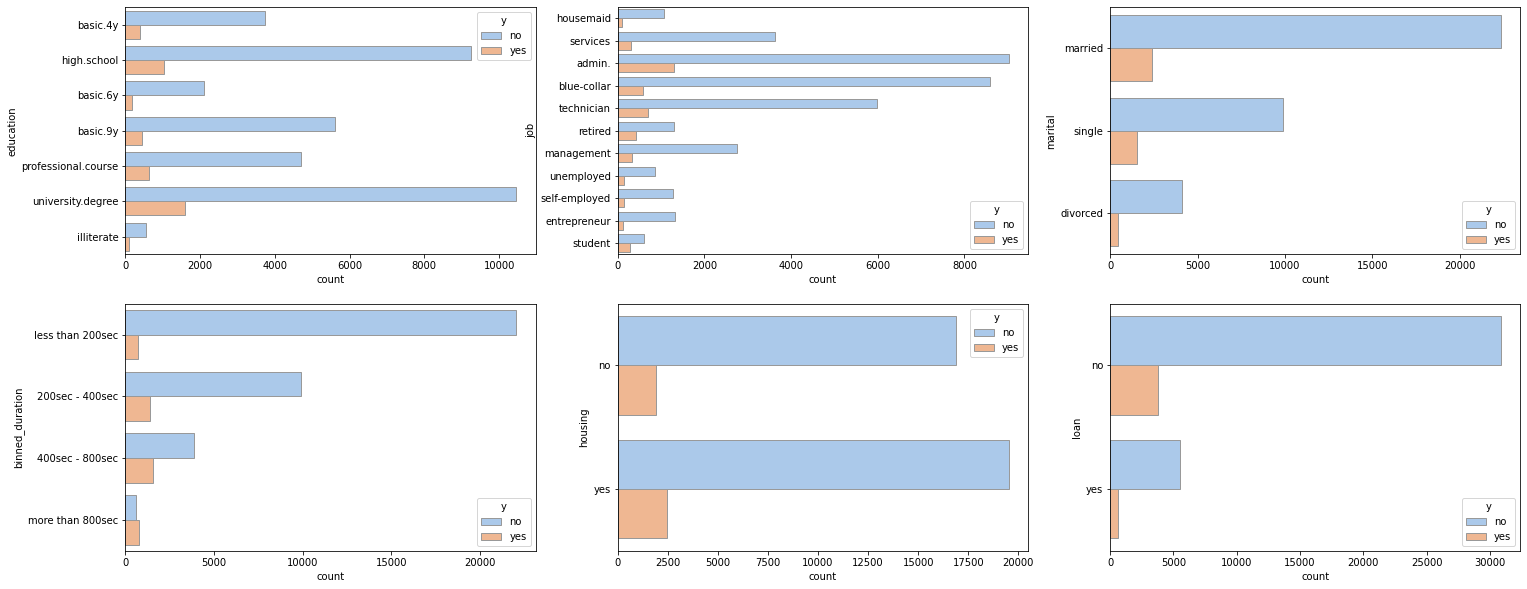

In [34]:
# load data file generated after imputation

fig, axs = plt.subplots(2, 3, figsize=(25,10))
sns.countplot(y="education", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice, ax=axs[0, 0])
sns.countplot(y="job", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice, ax=axs[0, 1])
sns.countplot(y="marital", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice, ax=axs[0, 2])
sns.countplot(y="binned_duration", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice, ax=axs[1, 0])
sns.countplot(y="housing", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice, ax=axs[1, 1])
sns.countplot(y="loan", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice, ax=axs[1, 2])

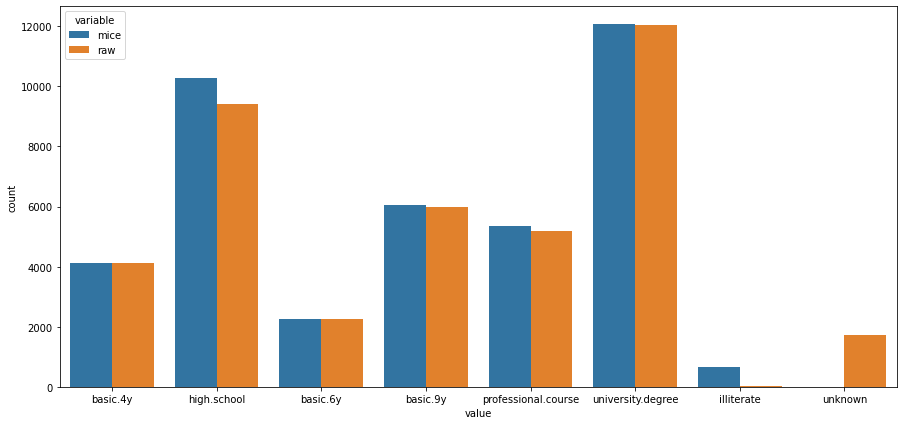

In [36]:
# Effect on Education before and after imputation

edu = pd.DataFrame()
edu["mice"] = bank_mice["education"]
edu["raw"] = bank_data["education"]

fig, axs = plt.subplots(1, 1, figsize=(15,7))
sns.countplot(x="value", hue="variable", data=pd.melt(edu))

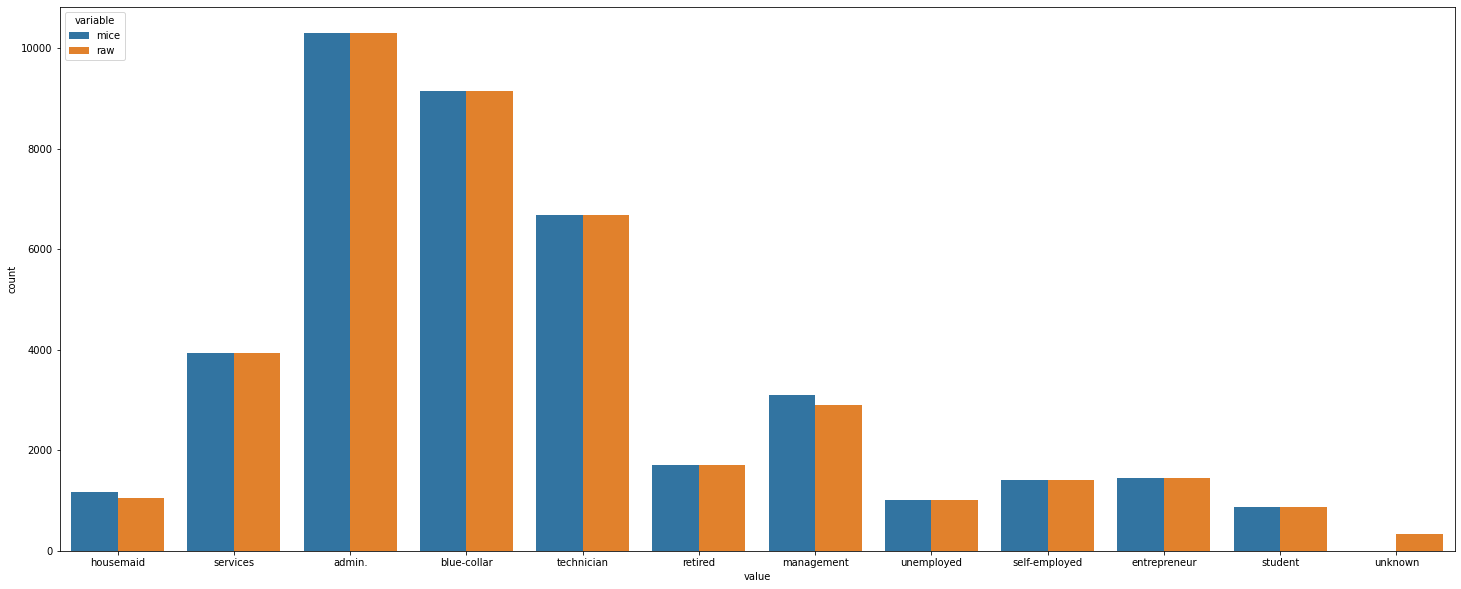

In [37]:
# Effect on Job before and after imputation

jobs = pd.DataFrame()
jobs["mice"] = bank_mice["job"]
jobs["raw"] = bank_data["job"]

fig, axs = plt.subplots(1, 1, figsize=(25,10))
sns.countplot(x="value", hue="variable", data=pd.melt(jobs))

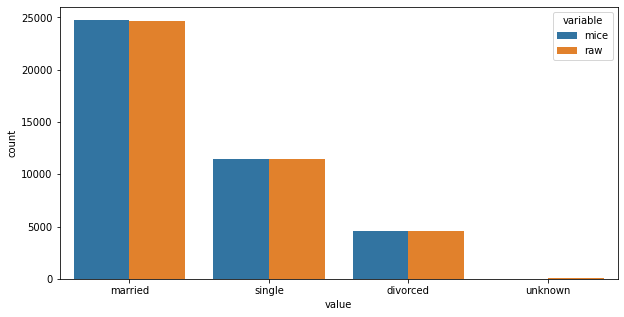

In [42]:
# Effect on Marital Status before and after imputation

mar = pd.DataFrame()
mar["mice"] = bank_mice["marital"]
mar["raw"] = bank_data["marital"]

fig, axs = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(x="value", hue="variable", data=pd.melt(mar))